In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [6]:
# Load the dataset
file_path = '../data/StudentPerformanceFactors.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
print(data.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [7]:
# Define target and features
X = data.drop(columns=['Exam_Score'])
y = data['Exam_Score']

# Identify numerical and categorical columns
numerical_cols = ['Hours_Studied', 'Sleep_Hours']
categorical_cols = ['Attendance', 'Parental_Involvement', 'Access_to_Resources',
                    'Extracurricular_Activities', 'Peer_Influence']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_processed = preprocessor.fit_transform(X)




In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"Training data size: {X_train.shape}")
print(f"Testing data size: {X_test.shape}")


Training data size: (5285, 49)
Testing data size: (1322, 49)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Define the neural network with an Input layer
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,313 (20.75 KB)

 Trainable params: 5,313 (20.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4135.6450 - mean_absolute_error: 63.9216 - val_loss: 715.9915 - val_mean_absolute_error: 24.8732
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 353.4181 - mean_absolute_error: 15.6428 - val_loss: 168.7004 - val_mean_absolute_error: 9.9588
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 185.3733 - mean_absolute_error: 10.8995 - val_loss: 120.1490 - val_mean_absolute_error: 8.4353
Epoch 4/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 145.3364 - mean_absolute_error: 9.6532 - val_loss: 80.7426 - val_mean_absolute_error: 6.8861
Epoch 5/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 107.3327 - mean_absolute_error: 8.2102 - val_loss: 52.5460 - val_mean_absolute_error: 5.4486
Epoch 6/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 80.3845 - mean_absolute_error: 7.1358 - val_loss: 33.8680 - val_mean_absolute_error: 4.1480
Epoch 7/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.3674 - mean_

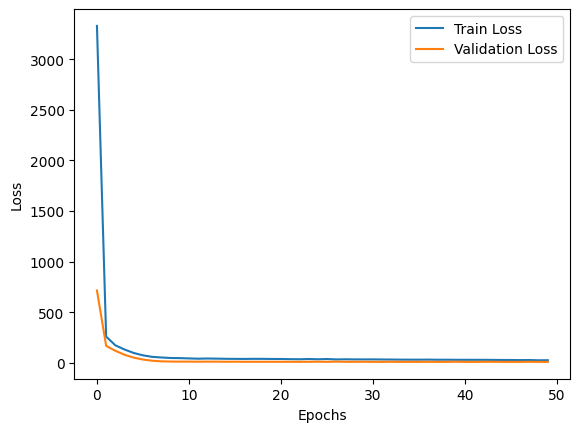

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [11]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

# Predict on the test set
y_pred = model.predict(X_test)


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9019 - mean_absolute_error: 1.3908  
Test Loss: 5.622006416320801
Test MAE: 1.3570226430892944
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [12]:
#  R^2 value
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")


R^2 Score: 0.6022655367851257


In [14]:
import shap

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


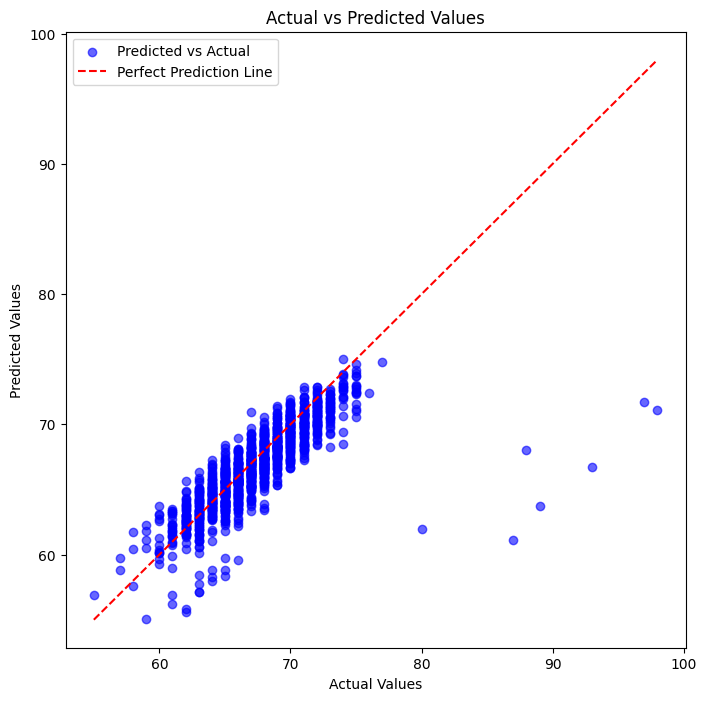

In [16]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = model.predict(X_test).flatten()  # Flatten to ensure 1D array

# Scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction Line')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()




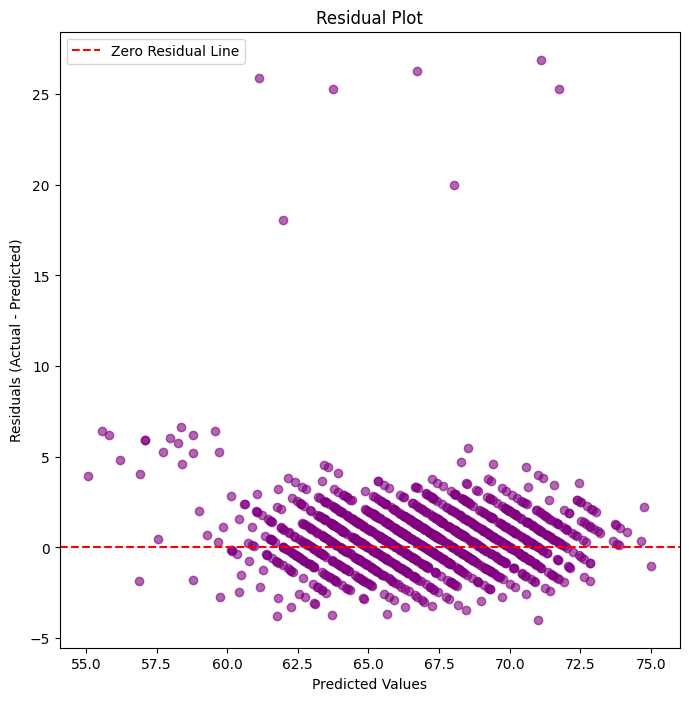

In [17]:
import numpy as np

# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(8, 8))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')  # Reference line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.legend()
plt.show()


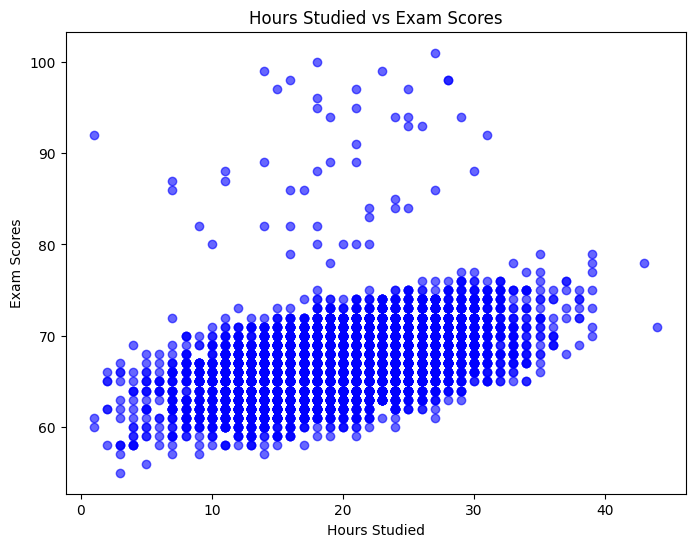

In [19]:
import matplotlib.pyplot as plt

# Scatter plot for Hours Studied vs Exam Scores
plt.figure(figsize=(8, 6))
plt.scatter(data['Hours_Studied'], data['Exam_Score'], alpha=0.6, color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.title('Hours Studied vs Exam Scores')
plt.show()


In [20]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test).flatten()  # Flatten the predictions to a 1D array if needed

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse}")


42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Mean Squared Error (MSE): 5.622006108198558
